In [156]:
import pandas as pd
from mlchartist.preprocessing import to_date, calculate_past_returns, proper_col, proper_name
from mlchartist.features import transform_file, calculate_past_returns, get_indicators
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
apple_test = transform_file('../raw_data/data/daily/us/nasdaq stocks/1/aapl.us.txt')[['date', '1D_past_return']]

/Users/Kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/Kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [138]:
apple_test

,date,1D_past_return
0,1984-10-24,0.009317
1,1984-10-25,-0.036824
2,1984-10-26,-0.025247
3,1984-10-29,0.003172
4,1984-10-30,0.013068
5,1984-10-31,-0.006450
6,1984-11-01,0.006491
7,1984-11-02,-0.006450
8,1984-11-05,-0.006491
9,1984-11-06,0.061756


In [ ]:

    df['date'] = to_date(df, 'date')
    df = proper_col(df)
    df.drop(columns=['per', 'time', 'openint'], inplace=True)
    df = get_indicators(df)
    df_final = calculate_real_returns(df)
    df_final = calculate_past_returns(df_final)
    df_final = df_final.dropna().drop(columns = ['open', 'high','low','close', 'vol']).reset_index(drop=True)

In [162]:
apple_test_manual = pd.read_csv('../raw_data/data/daily/us/nasdaq stocks/1/aapl.us.txt')

In [163]:
apple_test_manual.columns = [proper_name(col) for col in apple_test_manual.columns]

In [164]:
apple_test_manual['date'] = to_date(apple_test_manual, 'date')

In [166]:
apple_test_manual.drop(columns=['per', 'time', 'openint'], inplace=True)

In [167]:
apple_test_manual_past = calculate_past_returns(apple_test_manual)

In [168]:
apple_test_manual_past

,ticker,date,open,high,low,close,vol,1D_past_return,5D_past_return,10D_past_return
0,AAPL.US,1984-09-07,0.10197,0.10321,0.10075,0.10197,96517416,NaN,NaN,NaN
1,AAPL.US,1984-09-10,0.10197,0.10228,0.09952,0.10137,74913260,-0.005884,NaN,NaN
2,AAPL.US,1984-09-11,0.10228,0.10506,0.10228,0.10321,176649912,0.018151,NaN,NaN
3,AAPL.US,1984-09-12,0.10321,0.10382,0.10013,0.10013,154318764,-0.029842,NaN,NaN
4,AAPL.US,1984-09-13,0.10568,0.10598,0.10568,0.10568,240345769,0.055428,NaN,NaN
5,AAPL.US,1984-09-14,0.10598,0.10967,0.10598,0.10722,286176545,0.014572,0.051486,NaN
6,AAPL.US,1984-09-17,0.10999,0.11153,0.10999,0.10999,223441531,0.025835,0.085035,NaN
7,AAPL.US,1984-09-18,0.10999,0.11091,0.10598,0.10598,112798400,-0.036458,0.026838,NaN
8,AAPL.US,1984-09-19,0.10598,0.10722,0.10382,0.10382,123210945,-0.020381,0.036852,NaN
9,AAPL.US,1984-09-20,0.10414,0.10506,0.10414,0.10414,76705002,0.003082,-0.014572,NaN


In [175]:
df = pd.read_csv('../raw_data/data/daily/us/nasdaq stocks/1/aapl.us.txt')

In [176]:
df.drop(columns=['<PER>', '<OPENINT>', '<TIME>'], inplace=True)

In [177]:
df['<DATE>'] = to_date(df, '<DATE>')

In [178]:
df.columns

Index(['<TICKER>', '<DATE>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>'], dtype='object')

In [179]:
df.columns = ['ticker', 'date', 'open', 'high', 'low', 'close', 'vol']

In [181]:
((df['close']/df['close'].shift(1))-1).min()

-0.5184200946487076

In [145]:
returns_df = calculate_past_returns(df)

In [146]:
returns_df['1D_past_return'].min()

-0.4611627065492703

In [147]:
df.iloc[4026,:]

ticker                AAPL.US
date      2000-08-14 00:00:00
open                   0.7331
close                  0.7345
low                    0.7135
high                   0.7249
vol                 181603043
Name: 4026, dtype: object

Text(0.5, 1.0, '1D past return for APPLE')

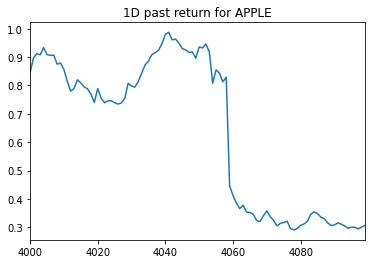

In [148]:
df.iloc[4000:4100, :].close.plot()
plt.title('1D past return for APPLE')

In [151]:
df['1D_past_return'] = df['close']/df['close'].shift(1)-1

In [153]:
df.iloc[20:]

,ticker,date,open,close,low,high,vol,1D_past_return
20,AAPL.US,1984-10-05,0.09765,0.09765,0.09489,0.09551,113110004,-0.006410
21,AAPL.US,1984-10-08,0.09551,0.09613,0.09551,0.09551,54451720,-0.015566
22,AAPL.US,1984-10-09,0.09551,0.09613,0.09459,0.09459,145204535,0.000000
23,AAPL.US,1984-10-10,0.09459,0.09459,0.09181,0.09181,422941982,-0.016020
24,AAPL.US,1984-10-11,0.09181,0.09428,0.09120,0.09120,211860502,-0.003277
25,AAPL.US,1984-10-12,0.09120,0.09181,0.08657,0.08719,308118250,-0.026199
26,AAPL.US,1984-10-15,0.09211,0.09304,0.09211,0.09211,281995945,0.013397
27,AAPL.US,1984-10-16,0.09211,0.09243,0.09181,0.09181,136817406,-0.006556
28,AAPL.US,1984-10-17,0.09551,0.09613,0.09551,0.09551,181583617,0.040030
29,AAPL.US,1984-10-18,0.09828,0.09891,0.09828,0.09828,286514110,0.028919


In [106]:
test_apple = pd.read_csv('../raw_data/processed/aapl.csv')

In [182]:
test_apple['1D_past_return'].min()

-0.5184200946487076

In [112]:
test_apple.iloc[4026]

ticker                       AAPL
date                   2000-09-29
RSI                       23.8474
Stochastic                1.05155
Stochastic_signal         15.5638
ADI                  -3.03221e+10
OBV                  129577101406
ATR                     0.0834295
ADX                       22.5602
ADX_pos                    11.381
ADX_neg                   47.3363
MACD                   -0.0451246
MACD_diff              -0.0418531
MACD_signal           -0.00327151
5TD_return              -0.138232
10TD_return             -0.143825
20TD_return             -0.279588
1D_past_return           -0.51842
5D_past_return          -0.506258
10D_past_return         -0.533423
Name: 4026, dtype: object